In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
plt.style.use('bmh')

In [33]:
well1 = pd.read_csv('well1.csv', index_col = 'date', parse_dates=True)
well1.head()

,bhp,bht,dp_tubing,thp,tht,choke_size_percentage,QL,QG
date,,,,,,,,
2008-02-12,308.055940,104.418090,201.250000,106.805939,16.294718,92.475107,1397.551304,81158.963478
2008-02-13,303.033518,105.402696,182.144942,120.888576,53.374330,89.620148,1876.830000,285246.160000
2008-02-14,295.586061,105.775486,181.867887,113.718175,72.737631,80.120465,3333.600000,543951.872000
2008-02-15,297.662702,105.751875,180.832060,116.830642,69.995943,84.250990,2705.053996,397504.971058
2008-02-16,295.935519,105.811114,180.501045,115.434474,71.518347,82.359026,3056.690000,418474.000000


<AxesSubplot:xlabel='date'>

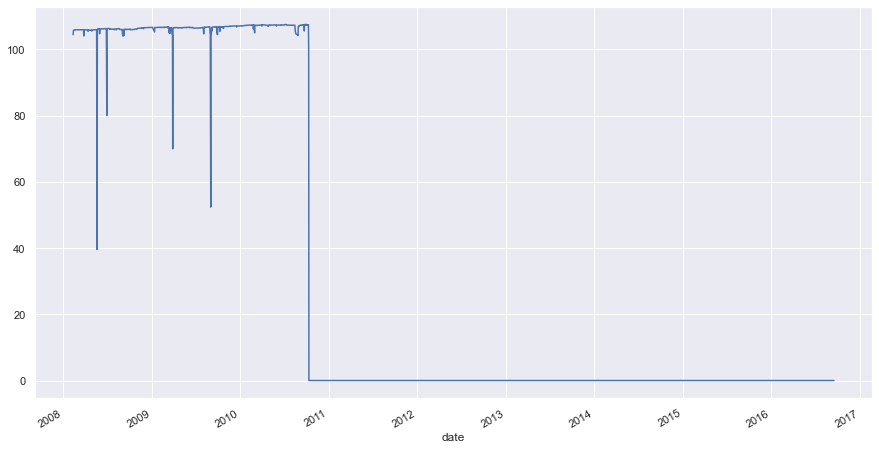

In [34]:
plt.figure(figsize=(15, 8))
well1['bht'].plot()

<AxesSubplot:xlabel='date'>

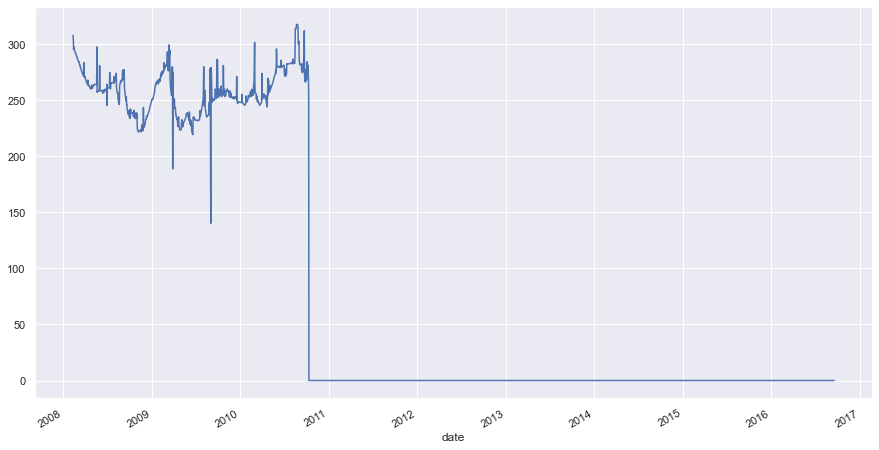

In [35]:
plt.figure(figsize=(15, 8))
well1['bhp'].plot()

In [36]:
df = well1[well1['bht'] > 0]
len(df)

961

In [37]:
def box_plot(df):
   
    columns = df.loc[:,:].columns.tolist()
    subplots_size = 9
    fig, ax = plt.subplots(2, 4, figsize=(30, 15))
    plt.subplots_adjust(hspace=0.25)
    
    a = 0
    b = 0
    for  colname in columns:
        sns.boxenplot(df[colname], ax=ax[a][b])

        ax[a][b].set_title(colname)
        b = b + 1
        if b == 4:
            b = 0
            a = a + 1       
    plt.show()

c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python31

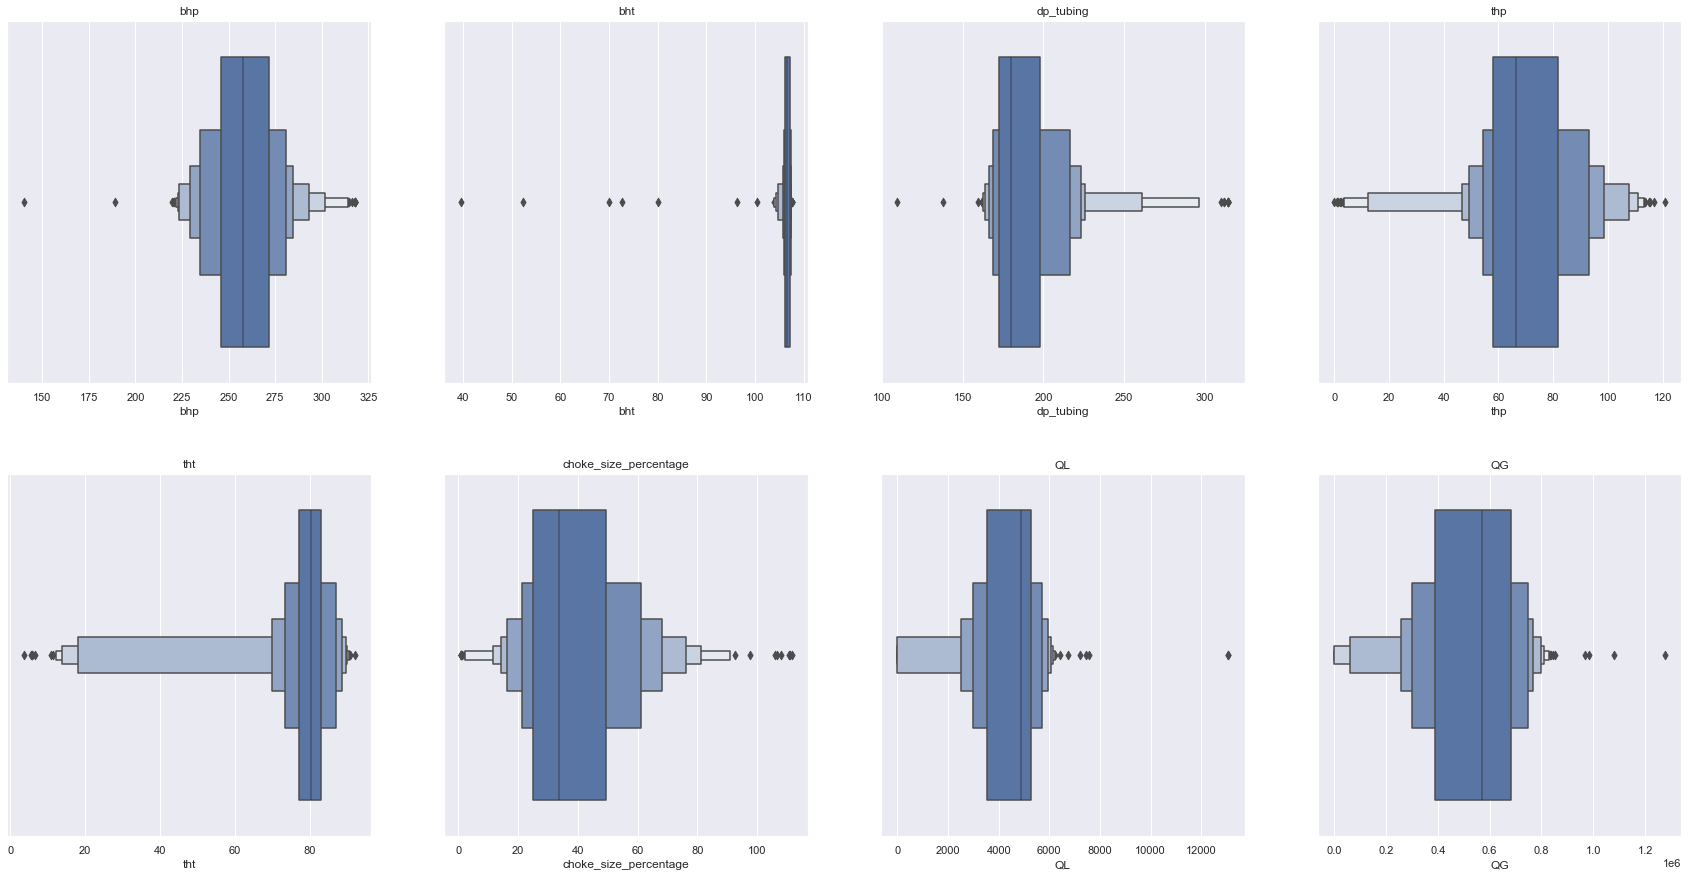

In [38]:
box_plot(df)

In [39]:
def iqr_outliers(data, p):
    q1, q3 = np.percentile(data, [25, 75])
    
    IQR = q3 - q1
    
    lower_fence = q1 - (p * IQR)
    upper_fence = q3 + (p * IQR)
 
    for i in range(len(data.values)):
        if data[i] > upper_fence or data[i] < lower_fence:
            data[i] = np.nan

    return data

In [40]:
df['bht'] = iqr_outliers(df['bht'], 1.5)
df['bht'] = df['bht'].interpolate(method='linear')

C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14236\6812795.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.nan
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14236\2416694395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bht'] = iqr_outliers(df['bht'], 1.5)
C:\Users\Ariyana-Soft\AppData\Local\Temp\ipykernel_14236\2416694395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bht'>

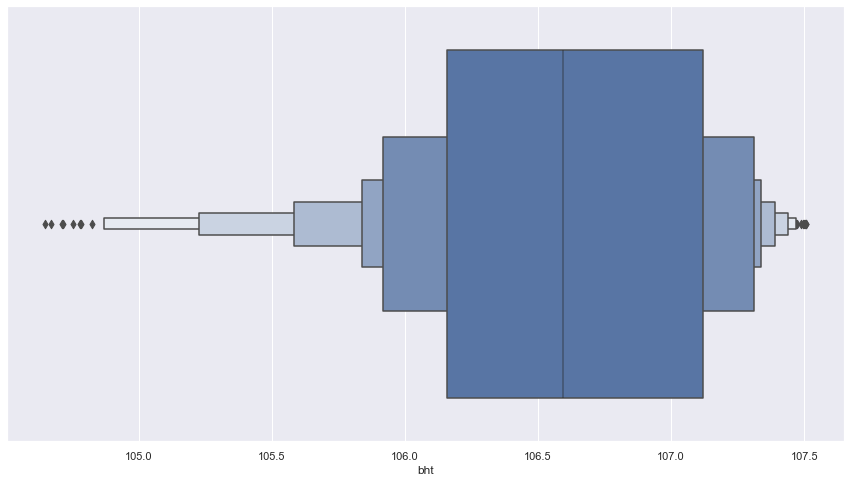

In [41]:
plt.figure(figsize=(15, 8))
sns.boxenplot(df['bht'])

In [42]:
last_1day = df.shift(+1)
last_2day = df.shift(+2)
last_3day = df.shift(+3)


last_1day.rename(columns={
    'bhp' : '1last_bhp',
    'bht' : '1last_bht',
    'dp_tubing' : '1last_dp_tubing',
    'AVG_CHOKE_SIZE_P' : '1last_AVG_CHOKE_SIZE_P',
    'thp' : '1last_thp',
    'tht' : "1last_tht",
    "choke_size_percentage" : "1last_choke_size_percentage",
    "QL" : "1last_QL",
    "QG" : "1last_QG"
}, inplace=True)
last_2day.rename(columns={
    'bhp' : '2last_bhp',
    'bht' : '2last_bht',
    'dp_tubing' : '2last_dp_tubing',
    'AVG_CHOKE_SIZE_P' : '2last_AVG_CHOKE_SIZE_P',
    'thp' : '2last_thp',
    'tht' : "2last_tht",
    "choke_size_percentage" : "2last_choke_size_percentage",
    "QL" : "2last_QL",
    "QG" : "2last_QG"
},inplace=True)

df = pd.concat([df, last_1day, last_2day], axis=1)

In [43]:
df.head()

,bhp,bht,dp_tubing,thp,tht,choke_size_percentage,QL,QG,1last_bhp,1last_bht,...,1last_QL,1last_QG,2last_bhp,2last_bht,2last_dp_tubing,2last_thp,2last_tht,2last_choke_size_percentage,2last_QL,2last_QG
date,,,,,,,,,,,,,,,,,,,,,
2008-02-12,308.055940,NaN,201.250000,106.805939,16.294718,92.475107,1397.551304,81158.963478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-13,303.033518,105.402696,182.144942,120.888576,53.374330,89.620148,1876.830000,285246.160000,308.055940,NaN,...,1397.551304,81158.963478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-14,295.586061,105.775486,181.867887,113.718175,72.737631,80.120465,3333.600000,543951.872000,303.033518,105.402696,...,1876.830000,285246.160000,308.055940,NaN,201.250000,106.805939,16.294718,92.475107,1397.551304,81158.963478
2008-02-15,297.662702,105.751875,180.832060,116.830642,69.995943,84.250990,2705.053996,397504.971058,295.586061,105.775486,...,3333.600000,543951.872000,303.033518,105.402696,182.144942,120.888576,53.374330,89.620148,1876.830000,285246.160000
2008-02-16,295.935519,105.811114,180.501045,115.434474,71.518347,82.359026,3056.690000,418474.000000,297.662702,105.751875,...,2705.053996,397504.971058,295.586061,105.775486,181.867887,113.718175,72.737631,80.120465,3333.600000,543951.872000


In [44]:
df.dropna(inplace=True)

In [45]:
X_df = df.drop(['bhp', 'bht'], axis=1)
y_df = df['bht']

In [46]:
from sklearn.model_selection import train_test_split
X, X_b, y, y_b = train_test_split(X_df,y_df, test_size=0.1, random_state=42)

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xg_reg = xgb.XGBRegressor(verbosity=3)

param_grid = { 
    'colsample_bytre': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': [ 0.3, 0.35, 0.4,0.45,0.5],
    'max_depth' : [1],
    # ,3,5,7,9
    'n_estimators' :[1400,1500,1600,1700,1800]
}

CV_rfc = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X, y)

[23:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytre" } are not used.

[23:58:28] DEBUG: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:157: Using tree method: 2
[23:58:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:58:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[23:58:28] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruni

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [48]:
CV_rfc.best_params_

{'colsample_bytre': 1e-06,
 'learning_rate': 0.3,
 'max_depth': 1,
 'n_estimators': 1400}

In [49]:
data_matrix = xgb.DMatrix(data=X , label=y)
xg_reg = xgb.XGBRegressor(colsample_bytree=0.000001, learning_rate=0.3, max_depth=1, n_estimators=1400, verbosity=3)
xg_reg.fit(X, y)

[00:01:12] DEBUG: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:157: Using tree method: 2
[00:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 0 extra nodes, 0 pruned nodes, max_depth=0
[00:01:12] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/tree/updater_prune

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1e-06, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
from sklearn import metrics
y_pred = xg_reg.predict(X_b)
metrics.r2_score(y_b, y_pred)

0.8898595066055084

In [51]:
metrics.mean_absolute_error(y_b.values, y_pred)

0.086530447785569

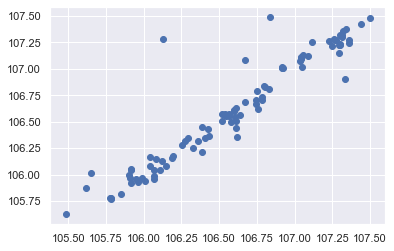

In [52]:
plt.scatter(y_b, y_pred)

In [53]:
blind_df = pd.DataFrame()
blind_df['y_pred'] = y_pred
blind_df['y_b'] = y_b.values

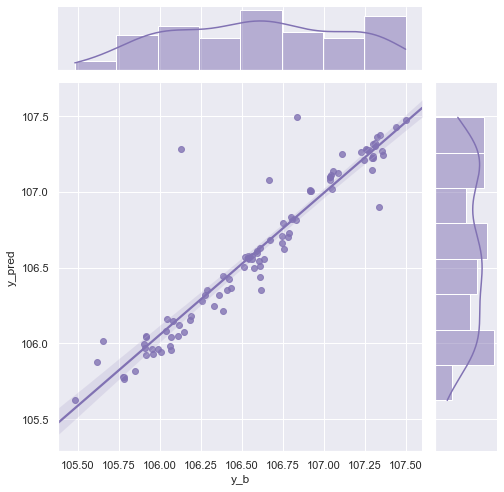

In [54]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="y_b", y="y_pred", data=blind_df,
                  kind="reg", truncate=False,
                 
                  color="m", height=7)

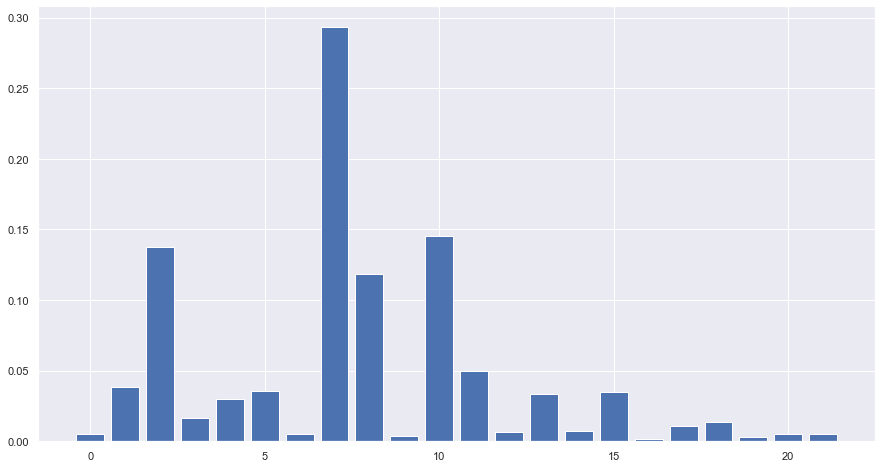

In [55]:
plt.figure(figsize=(15, 8))
plt.bar(range(len(xg_reg.feature_importances_)), xg_reg.feature_importances_)
plt.show()

In [56]:
print(xg_reg.feature_importances_)

[0.00536411 0.03822012 0.13735373 0.0167733  0.02962961 0.0355768
 0.00530742 0.293193   0.11831014 0.00360403 0.14544924 0.04949016
 0.00660109 0.03355456 0.00694865 0.03484007 0.00191449 0.01056645
 0.01383405 0.00316305 0.00484226 0.00546363]


In [57]:
xg_reg.save_model("bht.json")